In [258]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [582]:
train=pd.read_csv('/home/syed/titanic/train.csv')
test=pd.read_csv('/home/syed/titanic/test.csv')
g_m=pd.read_csv('/home/syed/titanic/gendermodel.csv')
g_c_m=pd.read_csv('/home/syed/titanic/genderclassmodel.csv')

In [557]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Age distribution for Survival

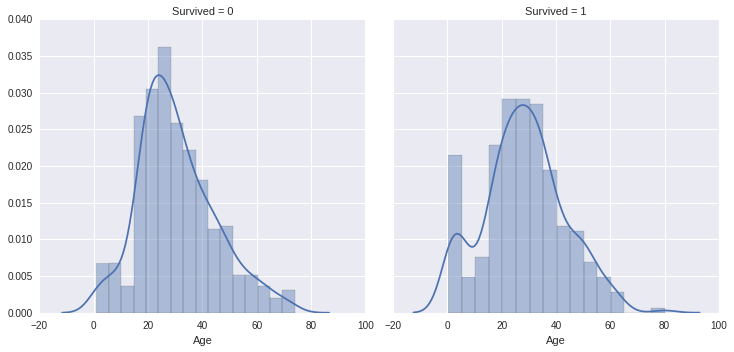

In [203]:
g= sns.FacetGrid(train, col="Survived", col_wrap=4, size=5)
g.map(sns.distplot,"Age" )

# Age distribution over Sex

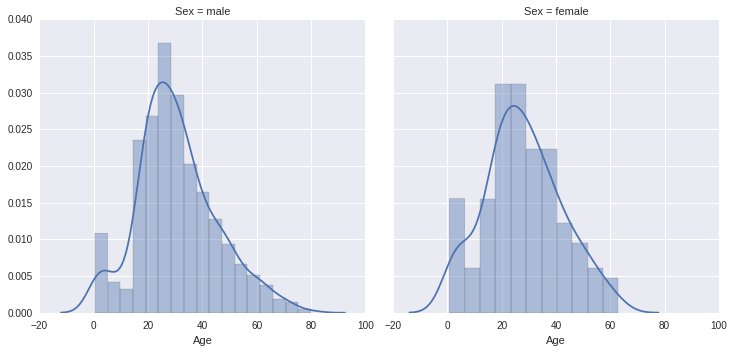

In [204]:
g= sns.FacetGrid(train, col="Sex", col_wrap=4, size=5)
g.map(sns.distplot,"Age" )

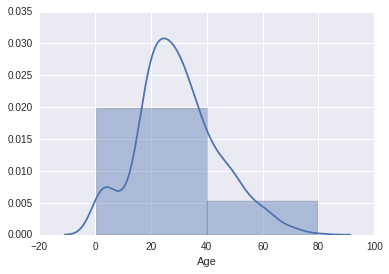

In [205]:
sns.distplot(train.Age.dropna(),bins=2)

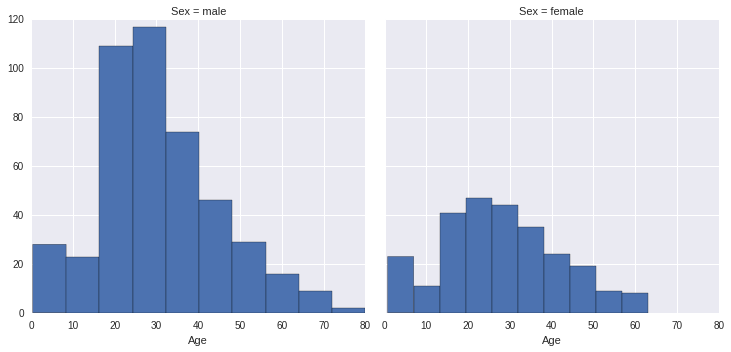

In [206]:
g= sns.FacetGrid(train, col="Sex", col_wrap=4, size=5)
g.map(plt.hist,"Age" )

# Survived passenger's Age distribution over Sex

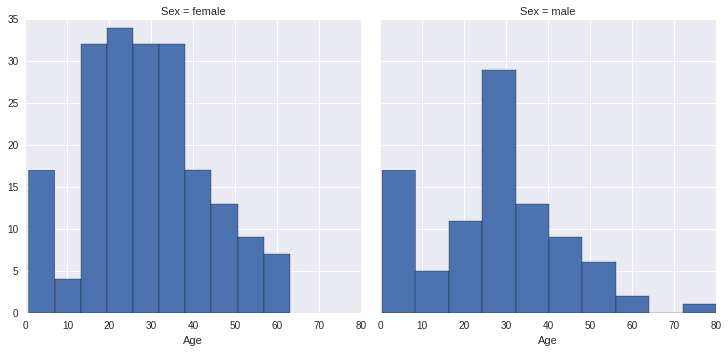

In [188]:
g= sns.FacetGrid(train[train.Survived==1], col="Sex", col_wrap=4, size=5)
g.map(plt.hist,"Age" )

# Dead passenger's Age distribution over Sex

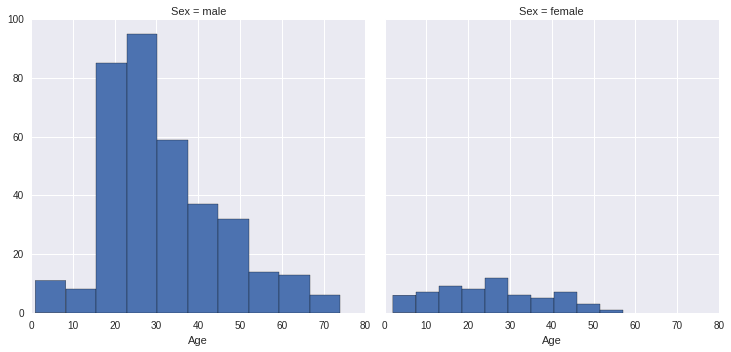

In [189]:
g= sns.FacetGrid(train[train.Survived==0], col="Sex", col_wrap=4, size=5)
g.map(plt.hist,"Age" )

# Survived passenger's distribution over Pclass

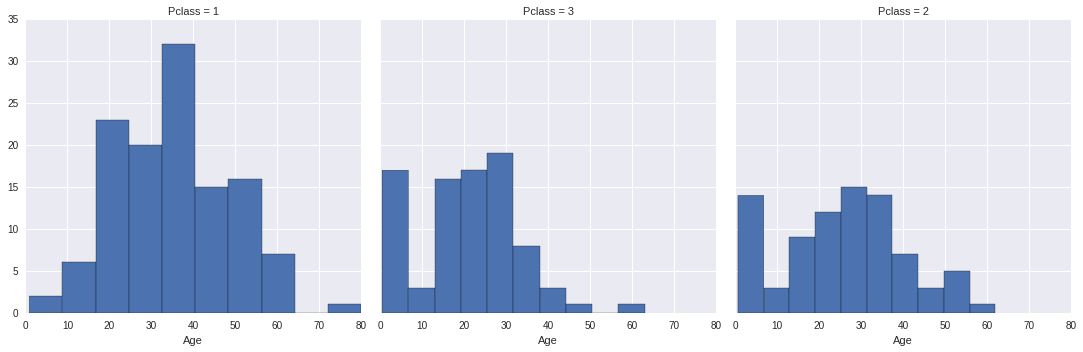

In [190]:
g= sns.FacetGrid(train[train.Survived==1], col="Pclass", col_wrap=4, size=5)
g.map(plt.hist,"Age" )

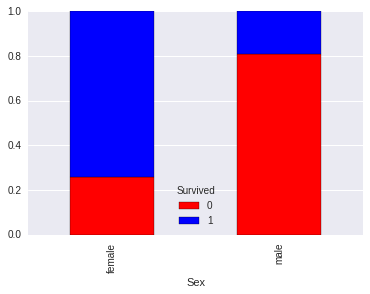

In [191]:
#females are more likely to survive
a=train.groupby('Sex').Survived.value_counts()/train.groupby('Sex').Survived.count()
a.unstack().plot(kind='bar',stacked=True,color=['r','b'])

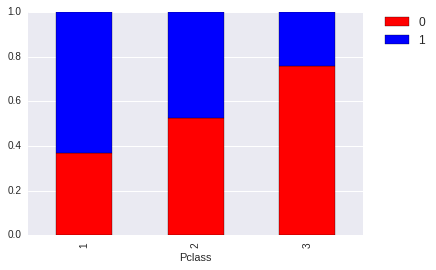

In [192]:
#higher class passengers are more likely to survive
a=train.groupby('Pclass').Survived.value_counts()/train.groupby('Pclass').Survived.count()
a.unstack().plot(kind='bar',stacked=True,color=['r','b'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=12)

In [193]:
train.Sex=train.Sex.map({'male':1,'female':0}).astype(int)

In [194]:
median_age=np.zeros((2,3))

In [8]:
for i in range(0,2):
    for j in range(0,3):
        train.loc[(train.Age.isnull())&(train.Sex==i)&(train.Pclass==j+1),'Age']=train[(train.Sex==i)&(train.Pclass==j+1)]['Age'].dropna().median()

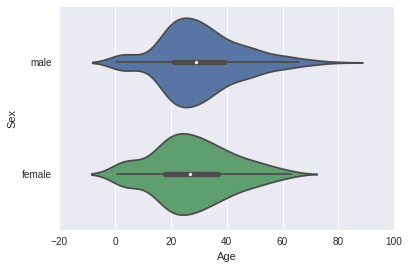

In [94]:
sns.violinplot(train.Sex,train.Age.dropna(),vert=False)

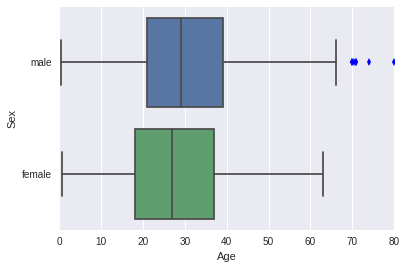

In [95]:
sns.boxplot(train.Sex,train.Age.dropna(),vert=False)

In [105]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   

   Parch     Ticket     Fare Cabin Embarked  family  
0      0  A/5 21171   7.2500   NaN        S       1  
1      0   PC 17599  71.2833   C85        C       1

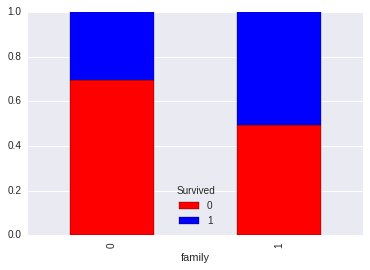

In [21]:
train['family']=train.SibSp+train.Parch
train.family=train.family.apply(lambda x: 1 if x>0 else 0 )
a=train.groupby('family').Survived.value_counts()/train.groupby('family').Survived.count()
a.unstack().plot(kind='bar',stacked=True,color=['r','b'])

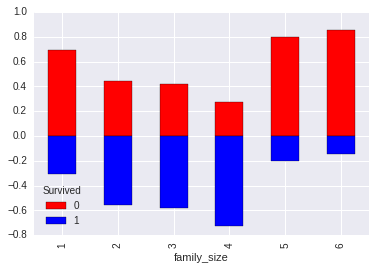

In [577]:
train.family_size=train.family_size.apply(cap)
a=train.groupby('family_size').Survived.value_counts()/train.groupby('family_size').Survived.count()
a=a.unstack()
a[1]=-a[1]
a.plot(kind='bar',stacked=True,color=['r','b'])

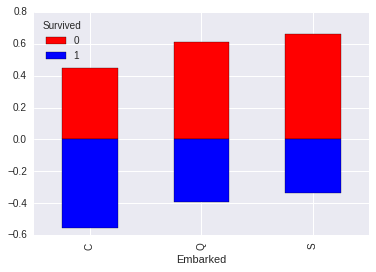

In [578]:
a=train.groupby('Embarked').Survived.value_counts()/train.groupby('Embarked').Survived.count()
a=a.unstack()
a[1]=-a[1]
a.plot(kind='bar',stacked=True,color=['r','b'])

# Creating new variables

In [583]:
#if the passenger has a family onboard then it is 1 else 0
train['family']=train.SibSp+train.Parch
train.family=train.family.apply(lambda x: 1 if x>0 else 0 )

In [584]:
#total no of family members onboard
train['family_size']=train.SibSp+train.Parch+1
def cap(x):
    if x>6:
        return 6
    else:
        return x
train.family_size=train.family_size.apply(cap)

In [585]:
test['family']=test.SibSp+test.Parch
test.family=test.family.apply(lambda x: 1 if x>0 else 0 )

In [586]:
test['family_size']=test.SibSp+test.Parch+1
def cap(x):
    if x>6:
        return 6
    else:
        return x
test.family_size=test.family_size.apply(cap)

In [587]:
#adding survived column to 0 for appending it with train data
test['Survived']=0

In [588]:
#Creating a new variable which denotes the salutation
def parse_des(x):
    x=re.findall(r',\s\w+.',x)
    return (re.findall(r'\w+',str(x)))[0]
train['desig']=train['Name'].apply(parse_des)
test['desig']=test['Name'].apply(parse_des)

In [589]:
train.desig.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Ms            1
Lady          1
the           1
Don           1
Mme           1
Capt          1
Sir           1
Name: desig, dtype: int64

In [590]:
data=train.append(test)
data.set_index(np.arange(0,np.size(data,axis=0)),inplace=True)

In [591]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
desig             0
family            0
family_size       0
dtype: int64

# Imputing missing values

In [592]:
#Creating a reference table based on mean partitioned on the basis of other variables
impute_ref=pd.DataFrame(data.groupby(['desig','Pclass']).Age.mean().dropna())

In [593]:
#checking types of missing ages info Ms is similar to Miss
data[data.desig=="Ms"]="Miss"
pd.DataFrame(data[data.Age.isnull()].groupby(['desig','Pclass']).Age.max())

Age
desig  Pclass     
Dr     1       NaN
Master 3       NaN
Miss   1       NaN
       2       NaN
       3       NaN
Mr     1       NaN
       2       NaN
       3       NaN
Mrs    1       NaN
       2       NaN
       3       NaN

In [594]:
#filling the values according to the reference table
for items in data[data.Age.isnull()].index:
    data.Age[items]=np.floor(impute_ref.ix[data.desig[items],data.Pclass[items]].Age)

In [598]:
#looking at the data we can say that these two passengers somehow related
data.loc[data.Embarked.isnull()]

Age Cabin Embarked Fare                                       Name Parch  \
61   38   B28      NaN   80                        Icard, Miss. Amelie     0   
829  62   B28      NaN   80  Stone, Mrs. George Nelson (Martha Evelyn)     0   

    PassengerId Pclass     Sex SibSp Survived  Ticket desig family family_size  
61           62      1  female     0        1  113572  Miss      0           1  
829         830      1  female     0        1  113572   Mrs      0           1

In [601]:
#as we can see from both the grouping, both of them have probably boarded from S.
data[(data.desig=='Miss') | (data.desig=='Mrs')].groupby(["Pclass","family"]).Embarked.max()

Pclass  family
1       0            S
        1            S
2       0            S
        1            S
3       0            S
        1            S
Miss    Miss      Miss
Name: Embarked, dtype: object

In [575]:
#filling the missing value with S 
data.Embarked[data.Embarked.isnull()]='S'